In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [2]:
# Load data & show it

df=pd.read_csv("weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
# information about data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
# Summary statistics

df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [5]:
# total of Null_Values in each column

df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [6]:
# drop columns with large number of Null_Values

#df.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm'],inplace=True,axis=1)


In [7]:
# drop rows with null values in 3 columns
df.dropna(subset=['MinTemp', 'MaxTemp', 'Rainfall'], inplace=True,axis=0)
df.shape

(141330, 23)

In [8]:
  # convert column  'Date' to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# create 2 columns for years & month
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month


In [9]:
dff = df.copy()

In [10]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141330 entries, 0 to 145458
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           141330 non-null  datetime64[ns]
 1   Location       141330 non-null  object        
 2   MinTemp        141330 non-null  float64       
 3   MaxTemp        141330 non-null  float64       
 4   Rainfall       141330 non-null  float64       
 5   Evaporation    81525 non-null   float64       
 6   Sunshine       74243 non-null   float64       
 7   WindGustDir    132299 non-null  object        
 8   WindGustSpeed  132357 non-null  float64       
 9   WindDir9am     131904 non-null  object        
 10  WindDir3pm     137930 non-null  object        
 11  WindSpeed9am   140467 non-null  float64       
 12  WindSpeed3pm   139039 non-null  float64       
 13  Humidity9am    140047 non-null  float64       
 14  Humidity3pm    138113 non-null  float64       
 15  Press

In [11]:
numerical_cols = ["Evaporation","Sunshine","Cloud9am","Cloud3pm",'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
categorical_cols = ['WindGustDir', 'WindDir9am', 'WindDir3pm']

In [12]:
# import class "SimpleImputer" for fill Nan values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

dff[numerical_cols] = imputer.fit_transform (dff[numerical_cols])

In [13]:
dff['RainTomorrow'].value_counts()

RainTomorrow
No     109032
Yes     31054
Name: count, dtype: int64

In [14]:
# fill NAN in 2 columns "RainTomorrow & RainToday" with mode
dff['RainTomorrow'].fillna(dff['RainTomorrow'].mode()[0], inplace=True)
dff['RainToday'].fillna(dff['RainToday'].mode()[0], inplace=True)

# fill NAN Another columns with Word "NN"
for i in categorical_cols:
    dff[i].fillna("NN", inplace=True)

C:\Users\ZBook\AppData\Local\Temp\ipykernel_11548\967692028.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dff['RainTomorrow'].fillna(dff['RainTomorrow'].mode()[0], inplace=True)
C:\Users\ZBook\AppData\Local\Temp\ipykernel_11548\967692028.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

In [15]:
print(dff.isnull().sum())


Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
year             0
month            0
dtype: int64


C:\Users\ZBook\AppData\Local\Temp\ipykernel_11548\485004938.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Season', y='MaxTemp', data=dff,palette='viridis')


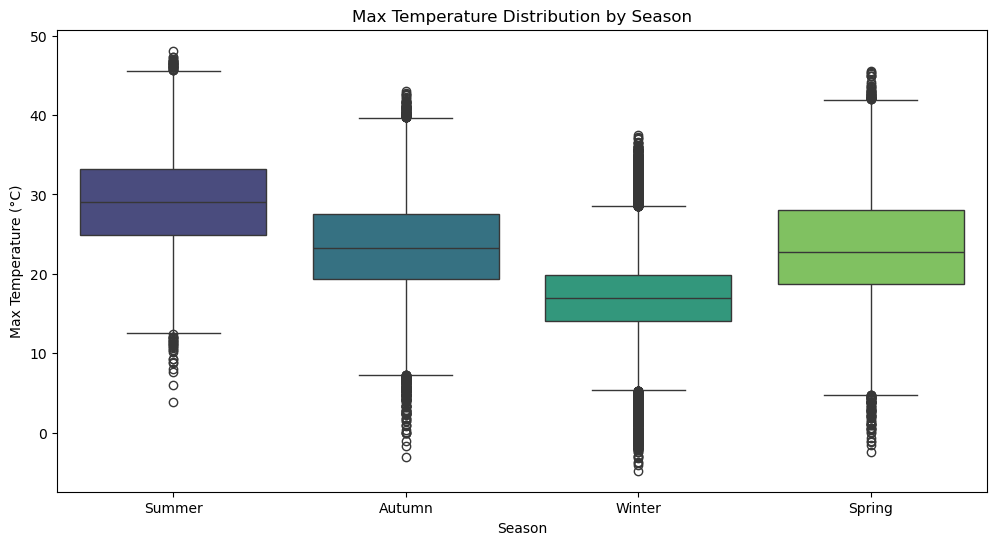

In [16]:
# Show outliers in column MaxTemp 
dff['Season'] = pd.cut(dff['Date'].dt.month, 
bins=[0, 3, 6, 9, 12], labels=['Summer', 'Autumn', 'Winter', 'Spring'], right=False)

plt.figure(figsize=(12, 6))

sns.boxplot(x='Season', y='MaxTemp', data=dff,palette='viridis')

plt.title('Max Temperature Distribution by Season')

plt.ylabel('Max Temperature (°C)')

plt.xlabel('Season')

plt.show()

In [17]:
# Handel outliers in column MaxTemp for each season

for season in dff['Season'].unique(): # unique to return [Spring, Summer, Summer, Autumn]
    season_data = dff[dff['Season'] == season]
    
    Q1 = season_data['MaxTemp'].quantile(0.25)
    Q3 = season_data['MaxTemp'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    median_value = season_data['MaxTemp'].median()
    dff.loc[(dff['Season'] == season) & 
                     (dff['MaxTemp'] < lower_bound), 'MaxTemp'] = median_value
    dff.loc[(dff['Season'] == season) & 
                     (dff['MaxTemp'] > upper_bound), 'MaxTemp'] = median_value

C:\Users\ZBook\AppData\Local\Temp\ipykernel_11548\2591405950.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Season', y='MaxTemp', data=dff,palette='viridis')


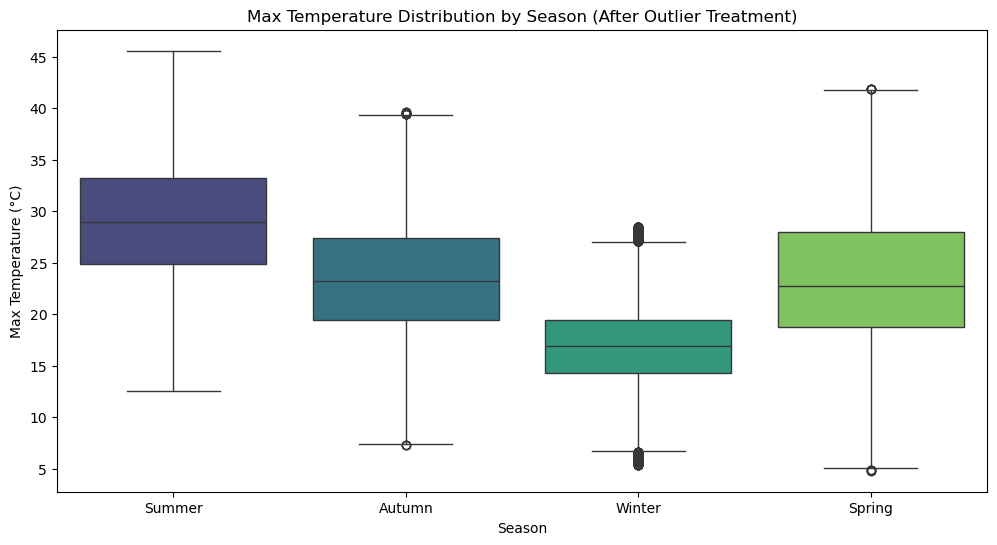

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Season', y='MaxTemp', data=dff,palette='viridis')
plt.title('Max Temperature Distribution by Season (After Outlier Treatment)')
plt.ylabel('Max Temperature (°C)')
plt.xlabel('Season')
plt.show()

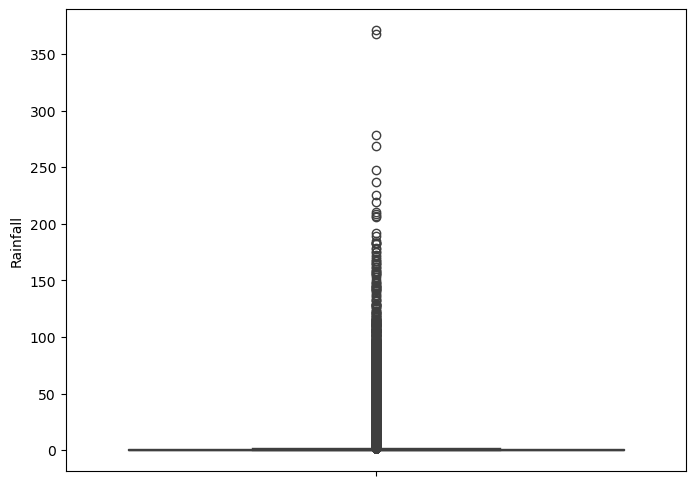

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=dff['Rainfall'])
plt.show()

In [20]:

def outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    return df

numerical_columns = dff.select_dtypes(include=['number']).columns
for col in numerical_columns:
    dff = outliers(dff, col)

C:\Users\ZBook\AppData\Local\Temp\ipykernel_11548\4039970858.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=dff['Rainfall'],palette='viridis')


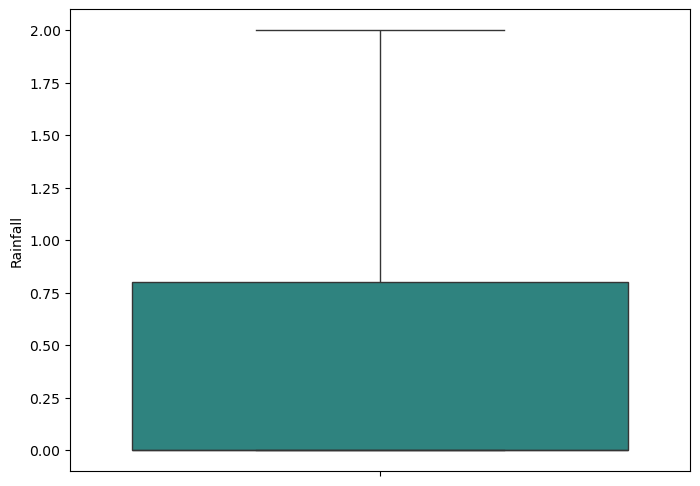

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=dff['Rainfall'],palette='viridis')
plt.show()

In [22]:
dff.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,month
count,141330,141330.000000,141330.000000,141330.000000,141330.000000,141330.000000,141330.000000,141330.000000,141330.000000,141330.000000,141330.000000,141330.000000,141330.000000,141330.000000,141330.000000,141330.000000,141330.000000,141330.000000,141330.000000
mean,2013-03-31 20:24:00.305667584,12.184374,23.145558,0.487139,4.795025,8.472483,39.603573,13.916217,18.566334,68.894538,51.478490,1017.677397,1015.272023,4.646508,4.735838,16.984458,21.680094,2012.758254,6.404896
min,2007-11-01 00:00:00,-6.200000,4.800000,0.000000,1.900000,7.450000,8.500000,0.000000,0.000000,18.000000,0.000000,1001.050000,998.400000,0.000000,1.000000,-1.500000,2.300000,2007.000000,1.000000
25%,2011-01-07 00:00:00,7.600000,17.800000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000,2011.000000,3.000000
50%,2013-05-27 00:00:00,12.000000,22.500000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,2013.000000,6.000000
75%,2015-06-11 00:00:00,16.800000,28.000000,0.800000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000,2015.000000,9.000000
max,2017-06-25 00:00:00,30.600000,43.300000,2.000000,7.500000,9.450000,68.500000,37.000000,40.500000,100.000000,100.000000,1034.250000,1032.000000,9.000000,9.000000,35.300000,40.700000,2017.000000,12.000000
std,NaN,6.402639,6.915600,0.792663,1.636510,0.680218,12.213288,8.561525,8.449033,18.817318,20.565961,6.597273,6.563073,2.298471,2.051468,6.479946,6.847753,2.538677,3.426298


In [23]:
# Remove duplicates
dff.drop_duplicates(inplace=True)


In [24]:
#number of catedories in each column

print("number of unique values in every columns\n")
for col in dff.columns:
    unique_values = dff[col].nunique()
    print("******************************************")
    print(f'{col}: {unique_values} unique values')

number of unique values in every columns

******************************************
Date: 3436 unique values
******************************************
Location: 49 unique values
******************************************
MinTemp: 367 unique values
******************************************
MaxTemp: 385 unique values
******************************************
Rainfall: 21 unique values
******************************************
Evaporation: 59 unique values
******************************************
Sunshine: 22 unique values
******************************************
WindGustDir: 17 unique values
******************************************
WindGustSpeed: 34 unique values
******************************************
WindDir9am: 17 unique values
******************************************
WindDir3pm: 17 unique values
******************************************
WindSpeed9am: 21 unique values
******************************************
WindSpeed3pm: 23 unique values
***************************

In [25]:
#List of columns you want to encode
categorical_col=['Location','WindGustDir','WindDir3pm','WindDir9am','RainToday','RainTomorrow']

# creat object from class labelencoder
label_en=LabelEncoder()

for col in categorical_col:
    dff[col] = label_en.fit_transform(dff[col])



In [26]:
dff.drop(columns=['Season','Date'], inplace=True)

In [27]:
dff.dtypes


Location           int32
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int32
WindGustSpeed    float64
WindDir9am         int32
WindDir3pm         int32
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int32
RainTomorrow       int32
year             float64
month            float64
dtype: object

In [28]:
#List of columns you want to encode
categorical_col=['Location','WindGustDir','WindDir3pm','WindDir9am','RainToday','RainTomorrow']

# creat object from class labelencoder
label_en=LabelEncoder()

for col in categorical_col:
    dff[col] = label_en.fit_transform(dff[col])



In [29]:
# Calculate the correlation matrix, excluding non-numeric columns
corr_matrix = dff.select_dtypes(include=['number']).corr()

# Correlation between "RainTomorrow" and other features
print(corr_matrix['RainTomorrow'].sort_values(ascending=False))

RainTomorrow     1.000000
Humidity3pm      0.438986
Rainfall         0.330003
RainToday        0.309878
Cloud3pm         0.296021
Humidity9am      0.255383
Cloud9am         0.247355
WindGustSpeed    0.219881
WindSpeed9am     0.086103
MinTemp          0.084140
WindSpeed3pm     0.082126
WindGustDir      0.044441
WindDir9am       0.034505
WindDir3pm       0.026999
month            0.007124
Location        -0.006035
year            -0.013259
Temp9am         -0.024777
Evaporation     -0.100586
MaxTemp         -0.144947
Temp3pm         -0.189450
Pressure3pm     -0.213581
Pressure9am     -0.232382
Sunshine        -0.293705
Name: RainTomorrow, dtype: float64


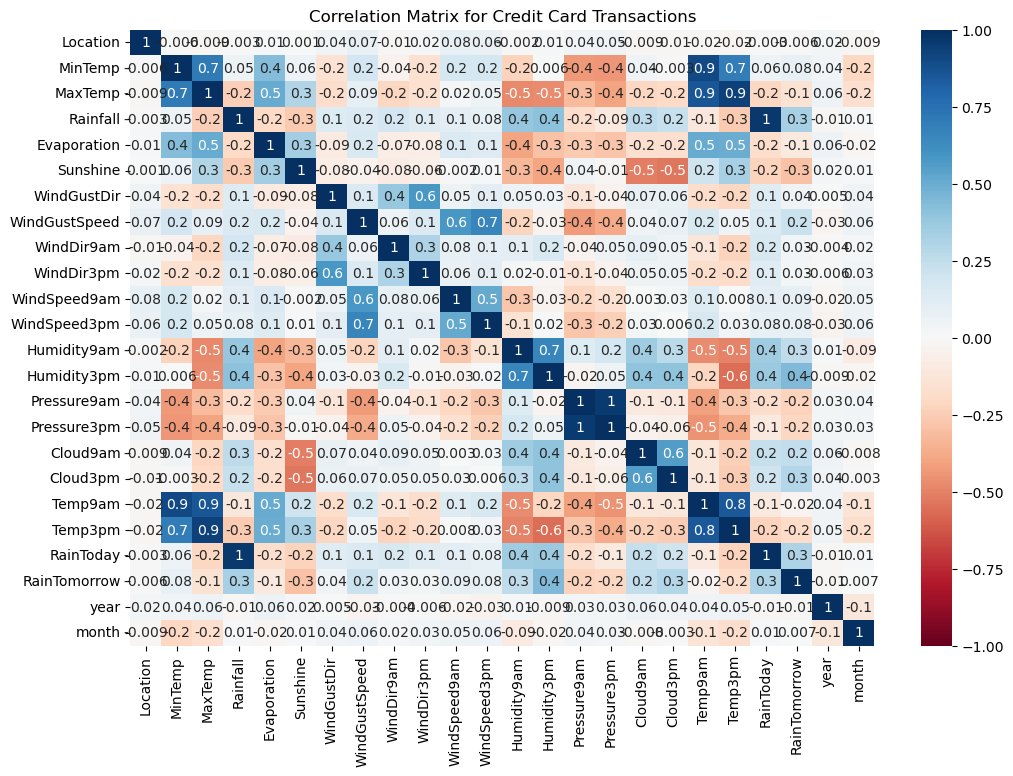

In [30]:
# Visualizing the Correlation between Columns
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True # to print the number in square
            , cmap='RdBu',
             fmt=".1g" #للتقريب لاول رقم عشري 
             , vmin=-1, vmax=1)
plt.title('Correlation Matrix for Credit Card Transactions')
plt.show()

In [31]:
# Split data to data & Target
X = dff.drop(columns=['RainTomorrow'])
y = dff['RainTomorrow']

columns = X.columns #save names of columns X in Variable "columns"

# creat object from StandardScaler class
Scaler = StandardScaler()

# normalize columns of X
X = Scaler.fit_transform(X)

In [32]:
#transform X to DataFrame
X_scaled = pd.DataFrame(X, columns=columns)

In [33]:
count_class = y.value_counts()
print("Class Distribution:")
print(count_class)

Class Distribution:
RainTomorrow
0    110276
1     31054
Name: count, dtype: int64


In [34]:
# imbalance ratio to measure the degree of imbalance between classes.

imbalance_ratio = max(count_class) / min(count_class)
print("Imbalance Ratio:", imbalance_ratio)

Imbalance Ratio: 3.5511045275970887


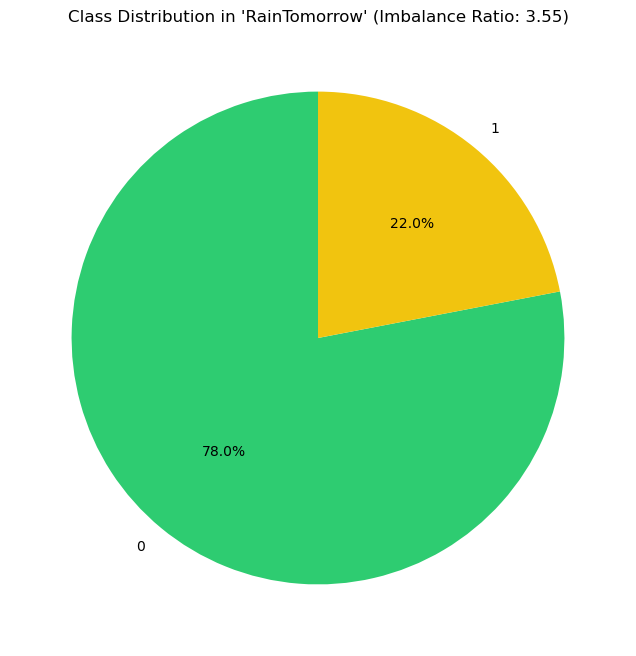

In [35]:
plt.figure(figsize=(8, 8))
plt.pie(count_class, labels=count_class.index, autopct='%1.1f%%' # show percintage in each part
        , startangle=90, colors=['#2ecc71', '#f1c40f'])
plt.title(f"Class Distribution in '{"RainTomorrow"}' (Imbalance Ratio: {imbalance_ratio:.2f})")
plt.show()

In [36]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
 
# Resample the data 
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [37]:
print("Data after SMOTE:")
data_after_resample = (y_resampled).value_counts()
print(data_after_resample)

Data after SMOTE:
RainTomorrow
0    110276
1    110276
Name: count, dtype: int64


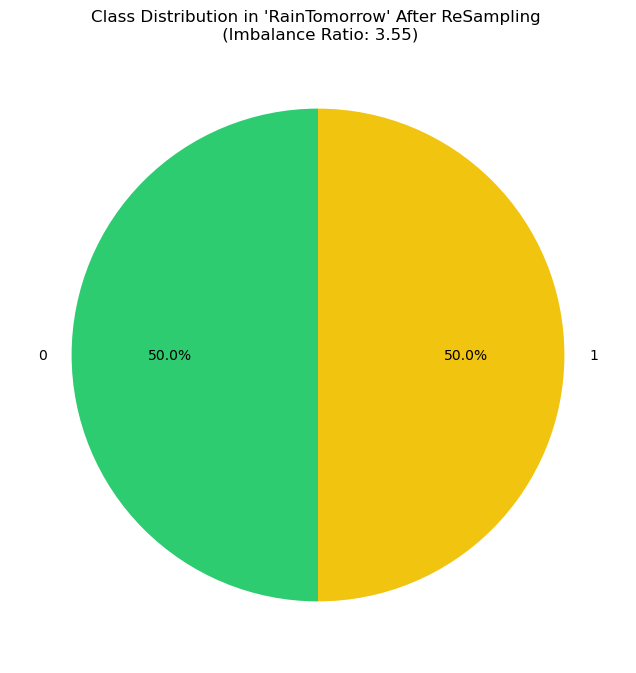

In [38]:
# show data after resampling
plt.figure(figsize=(8, 8))
plt.pie(data_after_resample, labels=data_after_resample.index, autopct='%1.1f%%' # show percintage in each part
        , startangle=90, colors=['#2ecc71', '#f1c40f'])
plt.title(f"Class Distribution in '{"RainTomorrow"}' After ReSampling \n (Imbalance Ratio: {imbalance_ratio:.2f})")
plt.show()

In [39]:
X = dff.drop(['RainTomorrow'], axis=1)
y = dff['RainTomorrow']

# Split the dataset into training and testing sets with randomization
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Check for duplicates in the datasets
print(f"Train set duplicates: {X_train.duplicated().sum()}")
print(f"Test set duplicates: {X_test.duplicated().sum()}")

Train set duplicates: 0
Test set duplicates: 0


In [40]:
#pip install xgboost


In [41]:
import xgboost 

from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_train_xgb = xgb.predict(X_train)
y_test_xgb = xgb.predict(X_test)

In [42]:
print("Accuracy for Training:", accuracy_score(y_train,y_train_xgb))
print("Accuracy for Testing:", accuracy_score(y_test,y_test_xgb))
print("Precision:", precision_score(y_test,y_test_xgb))
print("Recall:", recall_score(y_test,y_test_xgb))
print("F1 Score:", f1_score(y_test,y_test_xgb))
print(classification_report(y_test,y_test_xgb))

Accuracy for Training: 0.9212711331266542
Accuracy for Testing: 0.9086622384439256
Precision: 0.9350323390288637
Recall: 0.8783495805939696
F1 Score: 0.9058050639422065
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     22056
           1       0.94      0.88      0.91     22055

    accuracy                           0.91     44111
   macro avg       0.91      0.91      0.91     44111
weighted avg       0.91      0.91      0.91     44111



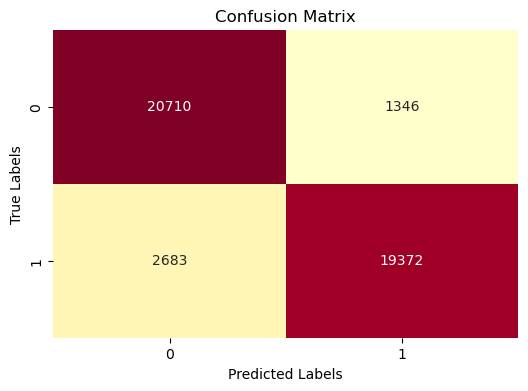

In [48]:
cm = confusion_matrix(y_test, y_test_xgb)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlOrRd", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()
